<a href="https://colab.research.google.com/github/Gnome101/MAT_422/blob/main/Module_3_5_3_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.5. K-means

This is an unsupervised machine learning algorithm that is used for **clustering**

Clustering is a technique in data analysis and machine learning where you group data points based on their similiarities.

The goal of K-means is to partition the data into $K$ clusters such that each data point belongs to the cluster with the nearest mean(average).

Its applications include customer segmentation, pattern recognition,

A high level overview of how it works follows:


1.   First you have to choose a $K$ value to represent the number of clusters that you want
2.   Then the algorithm randomly selectes $K$ points as centroids which is the center of each cluster
3.   Then the algorithm assigns data points to their closest centroid.
4.   Then the algorithm calculates new centroids by taking the averages of all points in a cluster
5.   They repeat the process until the centroids no longer change significantly

After clustering, intertia is a measure for how tightly the clusters are packed and the silhouette score is how similar a point is to its own cluster compared to other clusters.



In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs # we use this to create random data points

<ipython-input-13-36df72493dc7>:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data[:, 0], data[:, 1], cmap='viridis', marker='o', edgecolor='k', label='Data points')


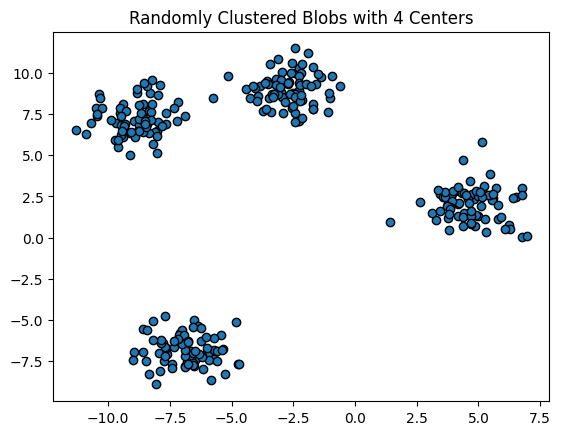

In [13]:
# We are going to generate random data with 300 points, divided into 4 clusters
data, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

plt.scatter(data[:, 0], data[:, 1], cmap='viridis', marker='o', edgecolor='k', label='Data points')
plt.title('Randomly Clustered Blobs with 4 Centers')
plt.show()
#As you can see below we generated 4 random blobs which all congergrate in 4 different areas.

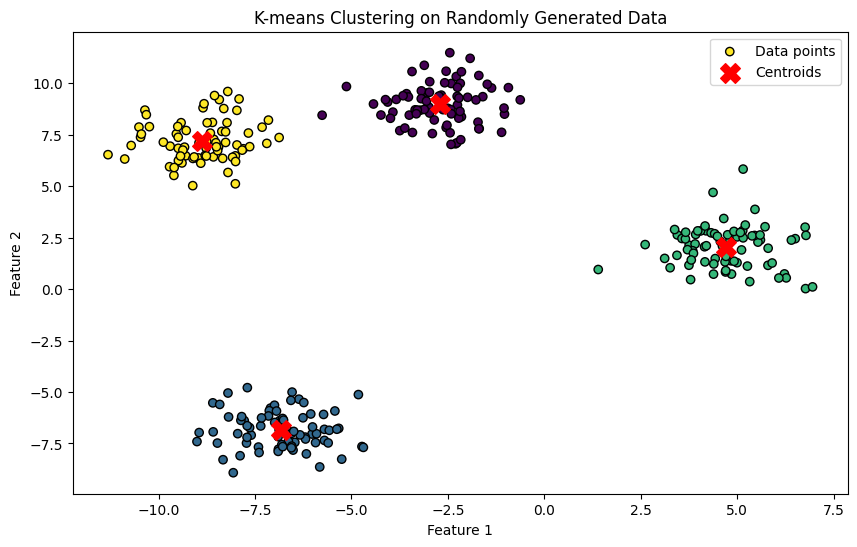

In [10]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

plt.figure(figsize=(10, 6))
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', label='Data points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.title('K-means Clustering on Randomly Generated Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
# Through K-Means we were able to find centroids that worked for the center of each blob.


# 3.6. Support vector machine

A support vector machine is a supervised machine learning algorithm used for **classification**.

Classification is a supervised learning technique where the goal is to categorize data points into predefined classes or categories. With classification, the algorithm learns from a labeled dataset to predict the class of new data points.

A support vector machine works by finding a hyperlane that can best seperate data points of different classes.

Its applications include image recognition, text classification, and bioinformatics(finding cancer cells).

A hyperlane is a decision boundary that seperates the data points of different classes. In a 2D space, its a line, and in 3D space its a plane.

The margin is the distance between the hyperlane and the closest data points from each class, the goal of the support vector machine is to maximize this margin making it best in determining the classificaiton of a point. The data points that lie closest to the decision boundary are called the support vectors.

The Kernel trick transforms the data into a higher dimensional space where a linear seperator may exist, which allows for a support vector machine to handle data that isn't linearly seperable by projecting it into a space where it becomes seperable.


In [16]:
#More imports
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

<ipython-input-41-8fc7d9296892>:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], cmap='coolwarm', marker='o',s=50, edgecolor='k', label='Data points')


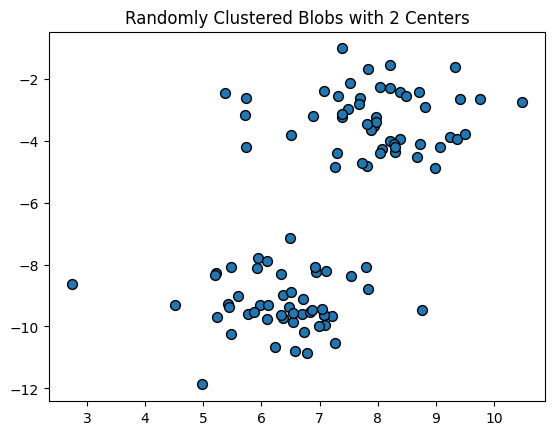

In [41]:
#We are going to generate more blobs, with just two centers this time
X, y = make_blobs(n_samples=100, centers=2, cluster_std=1, random_state=6)

plt.scatter(X[:, 0], X[:, 1], cmap='coolwarm', marker='o',s=50, edgecolor='k', label='Data points')
plt.title('Randomly Clustered Blobs with 2 Centers')
plt.show()
#As you can see below we generated 2 random blobs which all congergrate in 2 different areas.

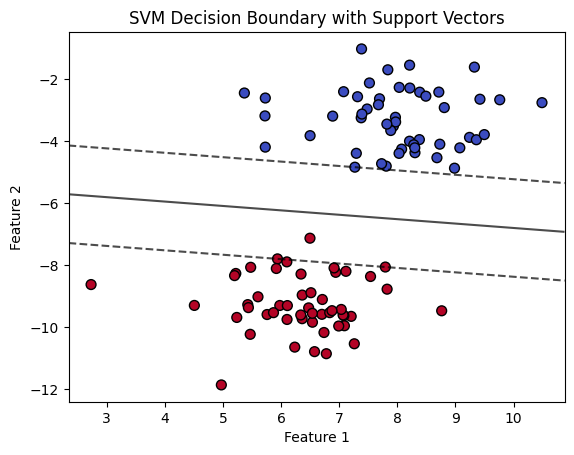

In [42]:
# We split the data into training and testing - 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# We use a linear kernel
svm = SVC(kernel='linear', C=1.0)
svm.fit(X_train, y_train)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=50, marker='o', edgecolor='k')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm.decision_function(xy).reshape(XX.shape)

# Next we plot the decision boundaries, with extra bounds
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.7,
            linestyles=['--', '-', '--'])

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title("SVM Decision Boundary Linear for 2 Blobs")
plt.show()